# start an ipcontroller and cluster first

%%bash 
ipcluster start -n 2

In [ ]:
import ipyparallel as ipp
rc = ipp.Client()

# Example

In [ ]:
with rc[:].sync_imports():
    import numpy

In [ ]:
%px a = numpy.random.rand(2,2)


In [ ]:
%px numpy.linalg.eigvals(a)


In [ ]:
%px print ('hi')


In [ ]:
# %%px --noblock
%cd twitteranalysis
from Executables import process_user_descriptions_into_words as Runner

from Servers import DatabaseServerGrumble as DSG 

import ipyparallel as ipp
rc = ipp.Client()



# lview = rc.load_balanced_view() 
# lview.block = True

# @lview.parallel()
# def start_db():
#     DSG.main()

# @lview.parallel()
# def run():
#     Runner.main()

# %%px --targets 1 

In [ ]:
rc.ids

In [ ]:

e1 = rc[0]
e2 = rc[1]
e1.apply(DSG.main())


In [ ]:
start_db()
print ('j')
run()

In [ ]:
%%px --noblock
print ('hi')



In [ ]:
%pxresult

# Based on quick and easy section

# instrumenting to determine if running parallel



In [30]:
%cd twitteranalysis
import environment
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


client_send_file = "%s/client-send.csv" % environment.LOG_FOLDER_PATH
client_enque_file = "%s/client-enque.csv" % environment.LOG_FOLDER_PATH
server_receive_file = "%s/server-receive.csv" % environment.LOG_FOLDER_PATH
server_save_file = "%s/server-save.csv" % environment.LOG_FOLDER_PATH

pickle = "%s/working-pickle" % environment.LOG_FOLDER_PATH


(bookmark:twitteranalysis) -> /Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis
/Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis


In [ ]:
server_receive.rename({server_receive.columns[0]: 'start', server_receive.columns[1]: 'stop'}, axis=1, inplace=True)

In [2]:
file_stems = ['client-send', 'client-enque', 'server-receive', 'server-save']

In [3]:
# def load(file_stems = file_stems):
series = []
columns = []
for f in file_stems:
    # make file path
    path = "%s/%s.csv" % (environment.LOG_FOLDER_PATH, f)
    s = pd.read_csv(path, squeeze=True)
#     s = s.apply(lambda x : pd.to_datetime(x))
    series.append(s)
    columns.append(f.replace('-', '_') )
# now assemble them into a data frame
#     return series
d = [{ columns[i] : series[i]} for i in range(0, len(series))]
# return DataFrame(d)



In [4]:
j = pd.concat(series)
j = set(j.values)
len(j)

81580

In [5]:
ja = DataFrame(index=j, columns=columns)
ja.reset_index(inplace=True)
ja = ja.rename({'index':'jj'}, axis=1)

In [6]:
ja[:9]

,jj,client_send,client_enque,server_receive,server_save
0,2018-04-26T18:10:21.218795,NaN,NaN,NaN,NaN
1,2018-04-26T18:10:43.711448,NaN,NaN,NaN,NaN
2,2018-04-26T18:10:44.165038,NaN,NaN,NaN,NaN
3,2018-04-26T18:10:45.744235,NaN,NaN,NaN,NaN
4,2018-04-26T18:10:27.015000,NaN,NaN,NaN,NaN
5,2018-04-26T18:10:26.206161,NaN,NaN,NaN,NaN
6,2018-04-26T18:10:35.445622,NaN,NaN,NaN,NaN
7,2018-04-26T18:10:40.496151,NaN,NaN,NaN,NaN
8,2018-04-26T18:10:46.752858,NaN,NaN,NaN,NaN


In [7]:
def ff(row, values, goodVal):
    if row.jj in values:
        return goodVal
    return 0

for i in range(0, len(columns)):
    name = columns[i]
    vs = series[i].values
    goodVal = i + 1
    ja[name] = ja.apply(lambda x : ff(x, vs, goodVal ), axis=1)

In [10]:
ja.to_pickle(pickle)

In [17]:
k = pd.read_pickle(pickle)
len(k)

81580

In [20]:
k.reset_index(inplace=True)
k = k.rename({'index':'jj'}, axis=1)

k[:5]

,jj,client_send,client_enque,server_receive,server_save
0,2018-04-26T18:10:21.218795,1,0,0,0
1,2018-04-26T18:10:43.711448,0,2,0,0
2,2018-04-26T18:10:44.165038,0,2,0,0
3,2018-04-26T18:10:45.744235,0,2,0,0
4,2018-04-26T18:10:27.015000,0,2,0,0


In [21]:
k.jj = k.apply(lambda x: pd.to_datetime(x))

In [23]:
k.set_index('jj', inplace=True)

In [24]:
len(k)

81580

In [25]:
k.to_pickle(pickle)

In [26]:
k = k.resample('S').mean()
len(k)

43

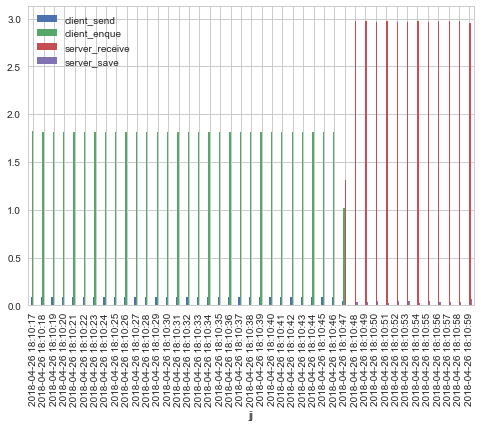

In [31]:
k.plot(kind='bar')

In [ ]:
d = load()

In [ ]:
ja.plot(kind='bar')

In [ ]:
d[:50]

In [ ]:
columns[2]

In [ ]:
DataFrame(series[3]).plot()

In [ ]:
data = load(fileStems)
len(data)

In [ ]:
data.plot()

In [ ]:
client_send = pd.read_csv("%s/client-send.csv" % environment.LOG_FOLDER_PATH, squeeze=True)
client_enque = pd.read_csv("%s/client-enque.csv" % environment.LOG_FOLDER_PATH, squeeze=True)
server_receive = pd.read_csv("%s/server-receive.csv" % environment.LOG_FOLDER_PATH)
server_save = pd.read_csv("%s/server-save.csv" % environment.LOG_FOLDER_PATH)


In [ ]:
client_send = client_send.apply(lambda x : pd.to_datetime(x))

In [ ]:
client_enque = client_enque.apply(lambda x : pd.to_datetime(x))

In [ ]:
len(client_enque)

In [ ]:
client_enque[:4]

In [ ]:
client_send[:4]

In [ ]:
server_receive.columns[0]

In [ ]:
server_receive

In [ ]:
from profiling.OptimizingTools import log_start_stop

In [ ]:
import time

loc = '%s/test-log.csv' % environment.LOG_FOLDER_PATH

@log_start_stop(loc)
def test():
    print('j')
    time.sleep(5)
    print('k')



In [ ]:
test()

In [ ]:
# Then we load the data in and look to see if all the timestamps
# for any of the operations cluster in ways we don't want them to

In [ ]:
🐈  TwitterDataAnalysis $python Servers/DatabaseServerGrumble.py

Or, you know, we could just run them in separate ipython notebooks
since those are handled by separate kernels